In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [2]:
# Load the dataset
df = pd.read_csv("student_performance.csv")

# Display first few rows
print(df.head())

# Display data types and feature names
print(df.dtypes)


   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196           2  
1             0  3

In [3]:
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values (example: filling with median)
df.fillna(df.median(), inplace=True)

# Encode categorical features
label_encoders = {}
categorical_features = ['Gender', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']

for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le

# Feature Scaling: Standardize numerical features
scaler = StandardScaler()
numerical_features = ['Age', 'StudyTimeWeekly', 'Absences']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [4]:
# Define the target variable (GPA) and features
X = df.drop(columns=['GPA'])  # Features
y = df['GPA']                 # Target


In [5]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Mean Squared Error (MSE): 0.05141211520918909
Root Mean Squared Error (RMSE): 0.22674239834929216
R^2 Score: 0.9378279265631576


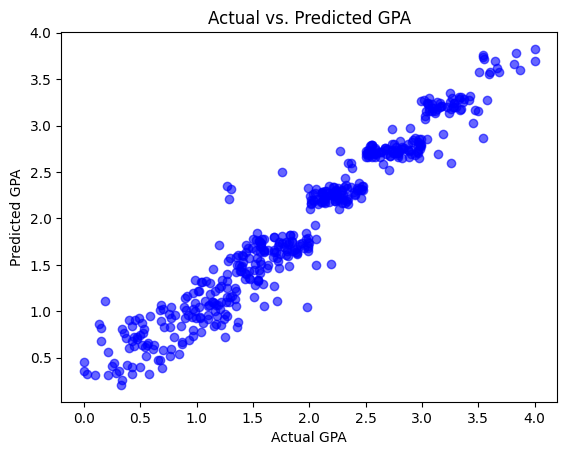

In [7]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

# Plot Actual vs. Predicted GPA
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.title('Actual vs. Predicted GPA')
plt.show()


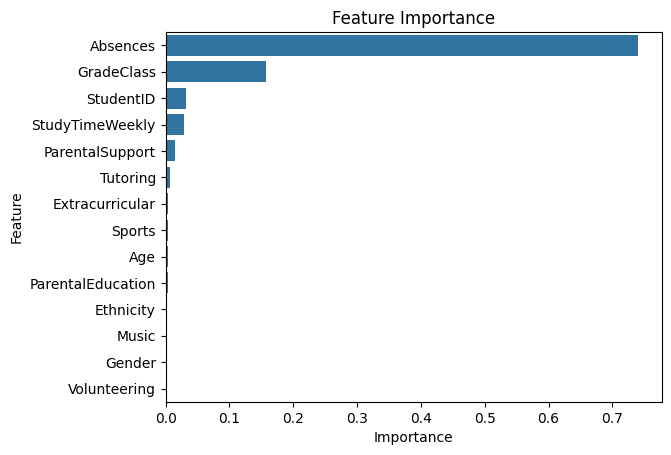

In [8]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()
